In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats

from lca import LCA

from sklearn.metrics import silhouette_score


## Prepare CB startup category groups data

In [2]:
data = pd.read_csv('funded_firms_info.csv',encoding='latin-1')
data

,org_uuid,domain,linkedin_url,description,name,category_list,category_groups_list
0,000014da-0c46-b9cb-0941-3a93c027b119,resilio.app,NaN,"Resilio is a digital well-being company, is co...",Resilio,"Computer,Education,Health Care,Software,Wellness","Consumer Electronics,Education,Hardware,Health..."
1,00002470-bff7-6226-5800-0ca1b3787b6f,codementor.io,https://www.linkedin.com/company/10036603,Codementor provides live 1:1 help for software...,Codementor,"['Developer Tools,Education,Information Techno...","['Commerce and Shopping,Education,Information ..."
2,00011be5-d105-eaa0-69d6-6064e74916b2,ru-lillii.com,https://www.linkedin.com/company/lillii-rnb/,"Founded in 2013 in Atlanta Georgia, Lillii is ...",Lillii RNB,"Consulting,Retail","Commerce and Shopping,Professional Services"
3,0002aa63-f21b-4c54-9495-895a1d09e0d4,86repairs.com,https://www.linkedin.com/company/86repairs,86 Repairs is a computer software company that...,86 Repairs,"['Big Data,Hospitality,Information Technology,...","['Artificial Intelligence,Data and Analytics,F..."
4,0006c816-e8f9-4071-ad0d-ce2f2ca1184c,thehummingbirds.co,https://www.linkedin.com/company/meet-the-humm...,Hummingbirds is a marketplace that helps brand...,Hummingbirds,"Digital Media,Information Technology","Information Technology,Media and Entertainment"
...,...,...,...,...,...,...,...
37901,fff82ec3-26e5-4585-93ce-fcb9b3722214,castos.com,https://www.linkedin.com/company/castos,Castos' podcasting WordPress plugin makes podc...,Castos,SaaS,Software
37902,fffbbe7b-cb08-4978-8c43-e45df717a1ba,olio.health,https://www.linkedin.com/company/oliohealth/,Olio is an information technology company that...,Olio,"Health Care,Home Health Care,Information Techn...","Health Care,Information Technology,Mobile"
37903,fffc7242-0efe-001a-60c1-49d76b282946,stackmob.com,https://www.linkedin.com/company/stackmob,StackMobâs mobile platform helps developers ...,StackMob,"Cloud Computing,Developer APIs,Mobile,PaaS,SaaS","Internet Services,Mobile,Software"
37904,ffff0f12-8825-4106-a886-4b22f7f70121,tryopenchefs.com,https://www.linkedin.com/company/openchefs,OpenChefs is an application that connects Chef...,OpenChefs,"App Marketing,Food and Beverage,Food Delivery,...","Food and Beverage,Sales and Marketing,Transpor..."


In [3]:
data = data[['org_uuid','category_groups_list']]
print(data.shape)

(37906, 2)


In [4]:
data['category_groups_list'] = data['category_groups_list'].str.replace("\n","")
data['category_groups_list'] = data['category_groups_list'].str.replace('" "',',')
data['category_groups_list'] = data['category_groups_list'].str.replace("' '",",")
data['category_groups_list'] = data['category_groups_list'].str.replace("' \"",",")
data['category_groups_list'] = data['category_groups_list'].str.replace("\" '",",")
data['category_groups_list'] = data['category_groups_list'].str.replace("[","")
data['category_groups_list'] = data['category_groups_list'].str.replace("]","")
data['category_groups_list'] = data['category_groups_list'].str.replace("'","")
data['category_groups_list'] = data['category_groups_list'].str.replace('"','')
data['category_groups_list'] = data['category_groups_list'].str.split(',')
data

/var/folders/4s/xr1k2zkn4cn5xjrw7w4_bdsc0000gn/T/ipykernel_63329/1842599508.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['category_groups_list'] = data['category_groups_list'].str.replace("\n","")
/var/folders/4s/xr1k2zkn4cn5xjrw7w4_bdsc0000gn/T/ipykernel_63329/1842599508.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['category_groups_list'] = data['category_groups_list'].str.replace('" "',',')
/var/folders/4s/xr1k2zkn4cn5xjrw7w4_bdsc0000gn/T/ipykernel_63329/1842599508.py:3: SettingWit

,org_uuid,category_groups_list
0,000014da-0c46-b9cb-0941-3a93c027b119,"[Consumer Electronics, Education, Hardware, He..."
1,00002470-bff7-6226-5800-0ca1b3787b6f,"[Commerce and Shopping, Education, Information..."
2,00011be5-d105-eaa0-69d6-6064e74916b2,"[Commerce and Shopping, Professional Services]"
3,0002aa63-f21b-4c54-9495-895a1d09e0d4,"[Artificial Intelligence, Data and Analytics, ..."
4,0006c816-e8f9-4071-ad0d-ce2f2ca1184c,"[Information Technology, Media and Entertainment]"
...,...,...
37901,fff82ec3-26e5-4585-93ce-fcb9b3722214,[Software]
37902,fffbbe7b-cb08-4978-8c43-e45df717a1ba,"[Health Care, Information Technology, Mobile]"
37903,fffc7242-0efe-001a-60c1-49d76b282946,"[Internet Services, Mobile, Software]"
37904,ffff0f12-8825-4106-a886-4b22f7f70121,"[Food and Beverage, Sales and Marketing, Trans..."


In [5]:
data = data.explode('category_groups_list')
data['category_groups_list'] = data['category_groups_list'].str.strip()
data = data.set_index('org_uuid')
data = data[data['category_groups_list']!='']
data

,category_groups_list
org_uuid,
000014da-0c46-b9cb-0941-3a93c027b119,Consumer Electronics
000014da-0c46-b9cb-0941-3a93c027b119,Education
000014da-0c46-b9cb-0941-3a93c027b119,Hardware
000014da-0c46-b9cb-0941-3a93c027b119,Health Care
000014da-0c46-b9cb-0941-3a93c027b119,Software
...,...
ffffabce-6d4a-b3d1-13c0-4e90cedf5270,Apps
ffffabce-6d4a-b3d1-13c0-4e90cedf5270,Financial Services
ffffabce-6d4a-b3d1-13c0-4e90cedf5270,Lending and Investments


In [7]:
columns = list(pd.get_dummies(data['category_groups_list']).columns)
columns

['Administrative Services',
 'Advertising',
 'Agriculture and Farming',
 'Apps',
 'Artificial Intelligence',
 'Biotechnology',
 'Clothing and Apparel',
 'Commerce and Shopping',
 'Community and Lifestyle',
 'Consumer Electronics',
 'Consumer Goods',
 'Content and Publishing',
 'Data and Analytics',
 'Design',
 'Education',
 'Energy',
 'Events',
 'Financial Services',
 'Food and Beverage',
 'Gaming',
 'Government and Military',
 'Hardware',
 'Health Care',
 'Information Technology',
 'Internet Services',
 'Lending and Investments',
 'Manufacturing',
 'Media and Entertainment',
 'Messaging and Telecommunications',
 'Mobile',
 'Music and Audio',
 'Natural Resources',
 'Navigation and Mapping',
 'Other',
 'Payments',
 'Platforms',
 'Privacy and Security',
 'Professional Services',
 'Real Estate',
 'Sales and Marketing',
 'Science and Engineering',
 'Software',
 'Sports',
 'Sustainability',
 'Transportation',
 'Travel and Tourism',
 'Video']

In [8]:
data = pd.get_dummies(data['category_groups_list']).groupby(level=0).max()
data

,Administrative Services,Advertising,Agriculture and Farming,Apps,Artificial Intelligence,Biotechnology,Clothing and Apparel,Commerce and Shopping,Community and Lifestyle,Consumer Electronics,...,Professional Services,Real Estate,Sales and Marketing,Science and Engineering,Software,Sports,Sustainability,Transportation,Travel and Tourism,Video
org_uuid,,,,,,,,,,,,,,,,,,,,,
000014da-0c46-b9cb-0941-3a93c027b119,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,True,False,False,False,False,False
00002470-bff7-6226-5800-0ca1b3787b6f,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,True,False,False,False,False,True
00011be5-d105-eaa0-69d6-6064e74916b2,False,False,False,False,False,False,False,True,False,False,...,True,False,False,False,False,False,False,False,False,False
0002aa63-f21b-4c54-9495-895a1d09e0d4,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,True,False,False,False,True,False
0006c816-e8f9-4071-ad0d-ce2f2ca1184c,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fff82ec3-26e5-4585-93ce-fcb9b3722214,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
fffbbe7b-cb08-4978-8c43-e45df717a1ba,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
fffc7242-0efe-001a-60c1-49d76b282946,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False


In [9]:
data[data.sum(axis=1)==0] ## checking all organizations have at least one label

,Administrative Services,Advertising,Agriculture and Farming,Apps,Artificial Intelligence,Biotechnology,Clothing and Apparel,Commerce and Shopping,Community and Lifestyle,Consumer Electronics,...,Professional Services,Real Estate,Sales and Marketing,Science and Engineering,Software,Sports,Sustainability,Transportation,Travel and Tourism,Video
org_uuid,,,,,,,,,,,,,,,,,,,,,


In [11]:
data_np = np.array(data.astype(int))
data_np.shape

(37218, 47)

## Select number of classes: First time silhouette score is high enough and BIC appears to level off

In [75]:
ks = [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
icls = []
sils = []
psts = []
for k in ks:
    lca = LCA(n_components=k, tol=10e-3, max_iter=300)
    lca.fit(data_np)
    print(k, lca.icl, lca.bic, lca.icl-lca.bic)
    icls.append(lca.icl)
    ## check silhouette score must be large enough (measures how well separated the clusters are)
    labels = lca.predict(data_np)
    sep = silhouette_score(data_np, labels)
    print(f"Average silhouette: {sep:.3f}")
    sils.append(sep)
    ## average posterior probabilities
    posteriors = lca.responsibility
    #pst_mean = posteriors.max(axis=1).mean()
    pst = 1 - np.mean(stats.entropy(posteriors.T)) / np.log(posteriors.shape[1])
    print(f"Mean max posterior: {posteriors.max(axis=1).mean():.3f}")
    print(f"Posterior certainty: {pst:.3f}")
    print(np.mean(stats.entropy(posteriors.T))) ## should equal (ICT-BIC)/2/N
    psts.append(pst)


55 637760.0972009515
Average silhouette: 0.167
60 635791.7172646729
Average silhouette: 0.162


In [ ]:
#bics = []
#sils = []
ks = [65,70,75,80,85,90,95,100,105,110,115,120,125,130,135,140,145,150,155,160,165,170,175,180,185,190,195,200]
for k in ks:
    lca = LCA(n_components=k, tol=10e-3, max_iter=300)
    lca.fit(data_np)
    print(k, lca.bic)
    bics.append(lca.bic)
    ## check silhouette score must be large enough (measures how well separated the clusters are)
    labels = lca.predict(data_np)
    sep = silhouette_score(data_np, labels)
    print(f"Average silhouette: {sep:.3f}")
    sils.append(sep)

65 635891.7584836255
Average silhouette: 0.175
70 633978.1738167865
Average silhouette: 0.167
75 632411.9228105035
Average silhouette: 0.172
80 633263.6328548972
Average silhouette: 0.171
85 631264.6348500167
Average silhouette: 0.173


[780799.9560164715, 746404.2809378349, 733183.6710571832, 719957.8530407565, 705755.98506332, 694677.6813491805, 688658.0928045516, 683197.5338679937, 678004.4849237176, 673185.480704763, 671602.0483209746, 668847.5133183036, 667762.9323921464, 663129.5559385406, 663222.8605450571, 660456.5919031104, 659060.9087909439, 658808.3560787536, 657963.1419995019, 655862.8427553393, 655775.5050656202, 654712.2302080131, 652632.6092610431, 653004.2900437746, 652349.0326906843, 651301.4222976869, 649212.4490280976, 649195.7418587938, 648085.096873666, 648419.9764673413, 648814.90246131, 646091.7352772073, 646626.6063906072]


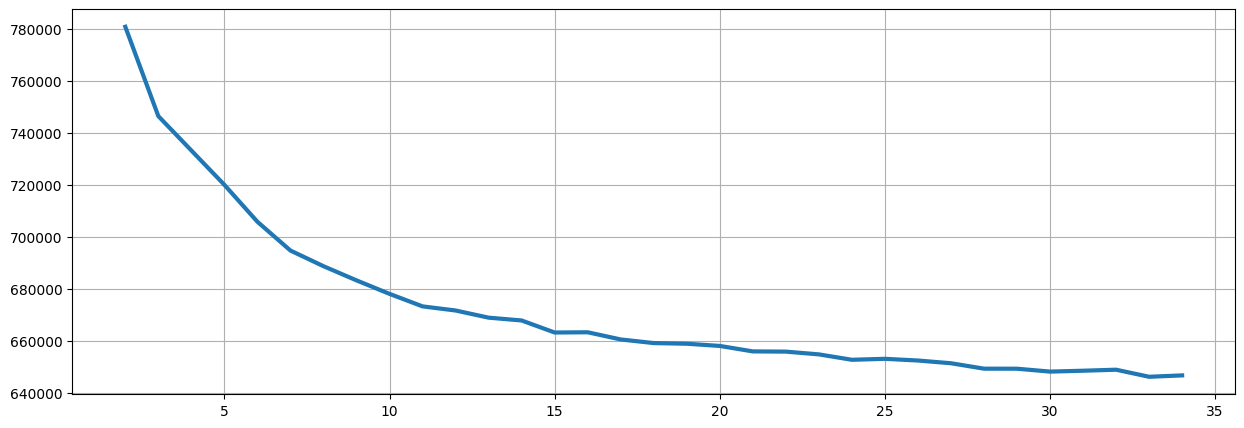

In [49]:
ks = [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
_,ax = plt.subplots(figsize=(15,5))
ax.plot(ks, bics, linewidth=3)
ax.grid(True)
print(bics)

In [64]:

labels      = lca.predict(data_np)               # hard class for each case
posteriors  = lca.predict_proba(data_np)         # soft assignments (n×K)
thetas       = lca.theta


## Train LCA model with the optimal number of classes

In [ ]:
lca = LCA(n_components=30, tol=10e-3, max_iter=300)

In [ ]:
%%time
lca.fit(data_np)

In [ ]:
display(lca.__dict__)
display(lca.weight)

In [ ]:
## CONVERGENCE GRAPH: NUMBER OF ITERATIONS AND LIKELIHOOD
_,ax = plt.subplots(figsize=(15,5))
ax.plot(lca.ll_[1:], linewidth=3)
ax.set_title("Log-Likelihod")
ax.set_xlabel("iteration")
ax.set_ylabel(r"p(x|$\theta$)")
ax.grid(True)

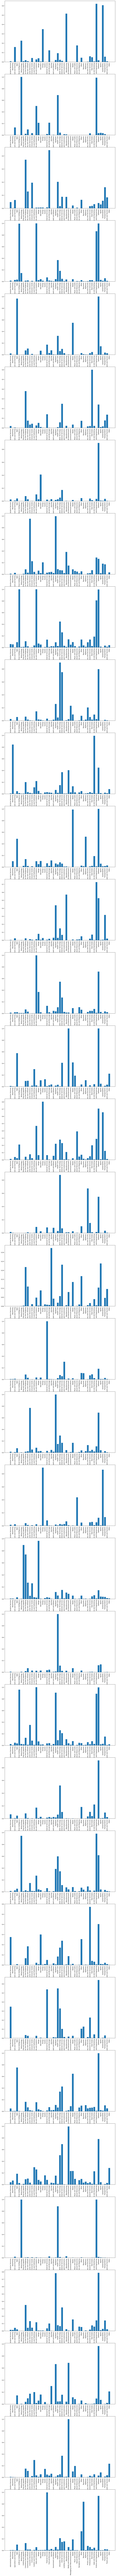

In [48]:
## PLOT THE CATEGORY GROUP DISTRIBUTIONS OF THE LATENT CLASSES
_,axs = plt.subplots(nrows=lca.theta.shape[0], figsize=(15,lca.theta.shape[0]*10))
axs = axs.ravel()
for i,ax in enumerate(axs):
    ax.bar(range(len(columns)),lca.theta[i,:])
    ax.set_xticks(range(len(columns)))
    ax.set_xticklabels(columns, rotation="vertical")

In [40]:
lca.weight

array([0.01317548, 0.00569711, 0.07013563, 0.03652454, 0.01977924,
       0.02697356, 0.03838755, 0.0107583 , 0.05917669, 0.04135461,
       0.0302983 , 0.00931617, 0.01818606, 0.02001988, 0.01745799,
       0.00794929, 0.0235963 , 0.02756002, 0.05284908, 0.03983913,
       0.01149701, 0.02044592, 0.07723779, 0.02185059, 0.05045865,
       0.00676818, 0.02244456, 0.00897527, 0.02763182, 0.01723921,
       0.05419419, 0.0211086 , 0.00877813, 0.0397834 , 0.04255172])

## Get latent cluster of each organization using their category groups labels

In [41]:
res = lca.predict(data_np)

In [42]:
res

array([19, 29, 26, ..., 28,  2,  4])

In [45]:
{x:list(res).count(x) for x in set(res)}

{0: 405,
 1: 166,
 2: 2727,
 3: 1367,
 4: 822,
 5: 746,
 6: 1691,
 7: 384,
 8: 2183,
 9: 1411,
 10: 1100,
 11: 332,
 12: 703,
 13: 867,
 14: 774,
 15: 244,
 16: 832,
 17: 973,
 18: 2212,
 19: 1483,
 20: 457,
 21: 744,
 22: 3217,
 23: 844,
 24: 1816,
 25: 223,
 26: 731,
 27: 204,
 28: 868,
 29: 561,
 30: 2096,
 31: 713,
 32: 255,
 33: 1558,
 34: 1509}

In [46]:
data_np.shape

(37218, 47)

In [47]:
data

,Administrative Services,Advertising,Agriculture and Farming,Apps,Artificial Intelligence,Biotechnology,Clothing and Apparel,Commerce and Shopping,Community and Lifestyle,Consumer Electronics,...,Professional Services,Real Estate,Sales and Marketing,Science and Engineering,Software,Sports,Sustainability,Transportation,Travel and Tourism,Video
org_uuid,,,,,,,,,,,,,,,,,,,,,
000014da-0c46-b9cb-0941-3a93c027b119,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,True,False,False,False,False,False
00002470-bff7-6226-5800-0ca1b3787b6f,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,True,False,False,False,False,True
00011be5-d105-eaa0-69d6-6064e74916b2,False,False,False,False,False,False,False,True,False,False,...,True,False,False,False,False,False,False,False,False,False
0002aa63-f21b-4c54-9495-895a1d09e0d4,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,True,False,False,False,True,False
0006c816-e8f9-4071-ad0d-ce2f2ca1184c,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fff82ec3-26e5-4585-93ce-fcb9b3722214,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
fffbbe7b-cb08-4978-8c43-e45df717a1ba,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
fffc7242-0efe-001a-60c1-49d76b282946,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
